# Transactions

## TX vs Raw TX
Bitcoin transactions are signed messages. We already saw that the signature is the product of the keys and original message. Therefor before we can SIGN the transaction we need to construct it, but the transaction is a SIGNED message. How to break the cycle?
The transaction that we are signing is not the the transaction that we'll send. It will be simillar to the finale transaction in all aspects but one: It will not contain the signature. Instead, it will simply include the previous redeem script, the one that we should solve - This is known as the raw transaction.
We'll obtain the transaction signature by signing the raw trasnaction (hashed twice `signature = sign(sha256(sha256(raw_tx)))`)
Now we'll remove the field that contained the previous redeem script and replace it with the signature to get our fianle, signed transaction.

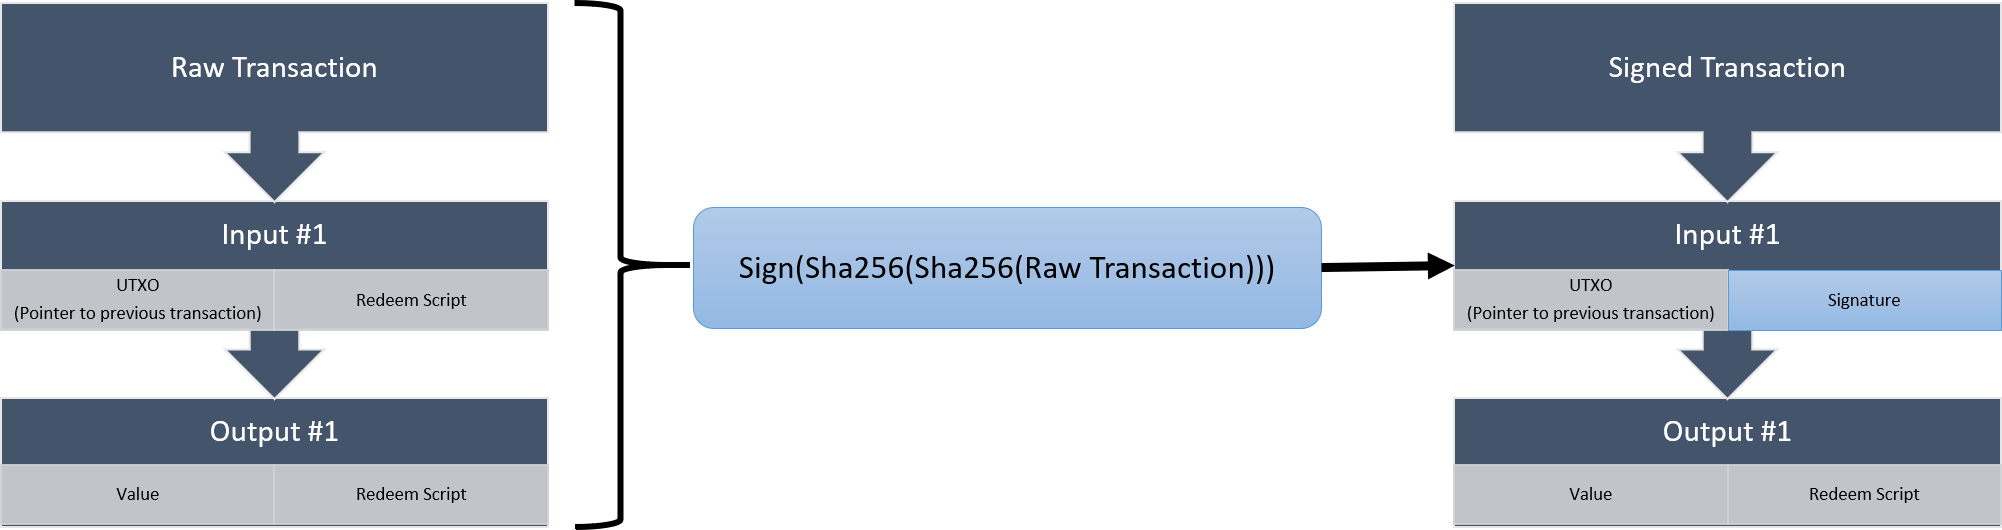

Creating a transaction is a three major steps process:
1. Create the bytecode of the raw transaction (The trasnaction message).
2. Sign your raw trasanctions.
3. Combine the transaction message with the signature to get you signed transaction.



https://bitcoin.org/en/developer-reference#raw-transaction-format

## Transaction form


| Bytes  | Name         | Data Type        | Description                                                                                                                                 |
|--------|--------------|------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| 4      | version      | uint32_t         | Transaction version number; currently version 1. Programs creating transactions using newer consensus rules may use higher version numbers. |
| Varies | tx_in count  | compactSize uint | Number of inputs in this transaction.                                                                                                       |
| Varies | tx_in        | txIn             | Transaction inputs. See description of txIn below.                                                                                          |
| Varies | tx_out count | compactSize uint | Number of outputs in this transaction.                                                                                                      |
| Varies | tx_out       | txOut            | Transaction outputs. See description of txOut below.                                                                                        |
| 4      | lock_time    | uint32_t         | A time (Unix epoch time) or block number. 0 for immediately.                                                                   |

In [21]:
version = (1).to_bytes(4, byteorder="little", signed=False)

tx_in_count = (1).to_bytes(1, byteorder="little", signed=False)

tx_in = "soon!"

tx_out_count = (1).to_bytes(1, byteorder="little", signed=False)

tx_out = "soon!"

lock_time = (0).to_bytes(4, byteorder="little", signed=False)

## Transaction input

The output of transaction A is the input of transaction B. The Unspend Transaction Output (UTXO) contains both spendable value and a redeem script.
Because transaction A can have more than one output, it's common to see transactions where only part of the ooutputs is spent.


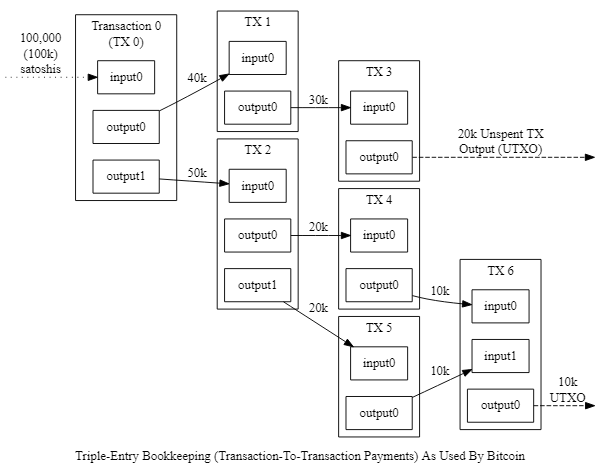


| Bytes  | Name             | Data Type        | Description                                                                                                                                                                     |
|--------|------------------|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 36     | previous_output  | outpoint         | The previous outpoint being spent. See description of outpoint below.                                                                                                           |
| Varies | script bytes     | compactSize uint | The number of bytes in the signature script. Maximum is 10000 bytes.                                                                                                            |
| Varies | signature script | char[]           | A script-language script which satisfies the conditions placed in the outpoint’s pubkey script. Should only contain data pushes; see the signature script modification warning. |
| 4      | sequence         | uint32_t         | Sequence number. Default for Bitcoin Core and almost all other programs is 0xffffffff.                                                                                          |


In [22]:
previous_output = "soon!"

# Assuming that the previous transaction was a P2PKH transaction, that means that the redeem script should be
# 76a914<hashed public key>88ac == <OP_DUP> <OP_HASH160> <OP_PUSH> <Hashed Public Key> <OP_EQUAL> <OP_CHECKSIG>
hashed_Public_key = "cb25e188213ac1568bc81ba04012cedc04b42d9b" # Where can we find the hashed public key? Maybe you should look at the second day of the course.
sigScript_raw = bytes.fromhex(f"76a914{hashed_Public_key}88ac")
sigScript_raw_size = (len(sigScript_raw)).to_bytes(1, byteorder="little", signed=False) # The script for P2PKH always has the same size. You know why!

sequence = bytes.fromhex("ffffffff")

## Previous output

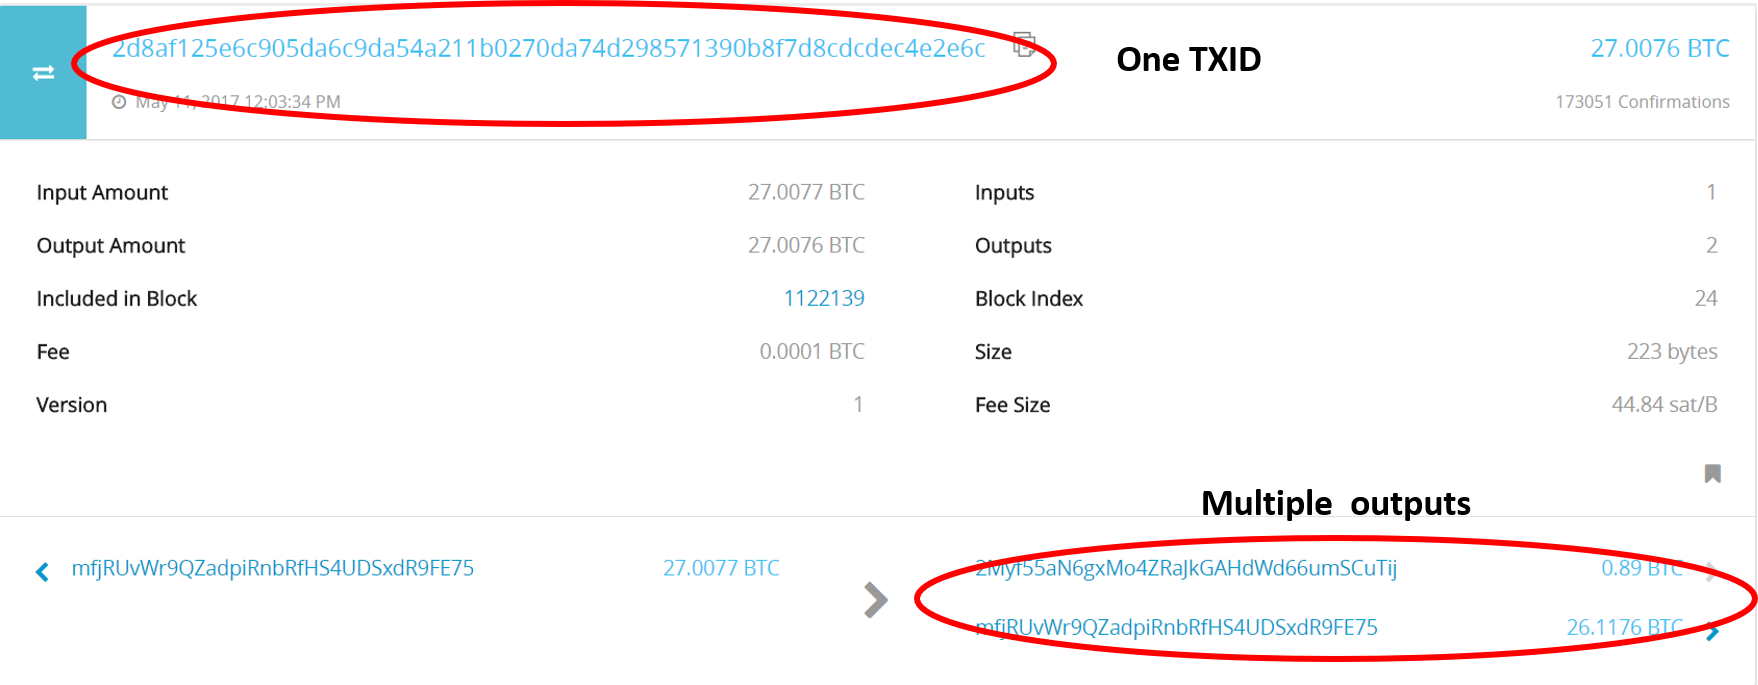


| Bytes | Name  | Data Type | Description                                                                                                       |
|-------|-------|-----------|-------------------------------------------------------------------------------------------------------------------|
| 32    | hash  | char[32]  | The TXID of the transaction holding the output to spend. The TXID is a hash provided here in internal byte order. |
| 4     | index | uint32_t  | The output index number of the specific output to spend from the transaction. The first output is 0x00000000.     |

In [23]:
# Find the index of the previouss transaction, the which you try to spend.
# Don't forget to switch it from little endian to big endian.
prv_tx_id = (bytes.fromhex("69345b2fdeecabc7c7ae2966cd112190c46e02758bcae0e5bdb9fc0d94770bee"))[::-1]
index = (0).to_bytes(4, byteorder="little", signed=False)

## Transaction output

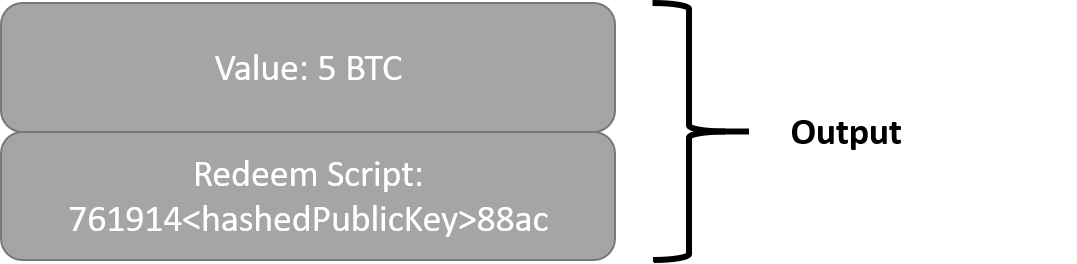


| Bytes  | Name            | Data Type        | Description                                                                                                                                                                                                                                                     |
|--------|-----------------|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 8      | value           | int64_t          | Number of satoshis to spend. May be zero; the sum of all outputs may not exceed the sum of satoshis previously spent to the outpoints provided in the input section. (Exception: coinbase transactions spend the block subsidy and collected transaction fees.) |
| 1+     | pk_script bytes | compactSize uint | Number of bytes in the pubkey script. Maximum is 10000 bytes.                                                                                                                                                                                                   |
| Varies | pk_script       | char[]           | Defines the conditions which must be satisfied to spend this output.                                                                                                                                                                                            |

In [24]:
tx_out_value = (196569603).to_bytes(8, byteorder="little", signed=True)

# The output will also be P2PKH, although you could choose another option if you like.
hashed_Public_key = "cb25e188213ac1568bc81ba04012cedc04b42d9b" # Where can we find the hashed public key? Maybe you should look at the second day of the course.
tx_out_pubScript = bytes.fromhex(f"76a914{hashed_Public_key}88ac")      
tx_out_pubScript_size = (len(tx_out_pubScript)).to_bytes(1, byteorder="little", signed=False) # The script for P2PKH always has the same size. You know why!

## Construct the raw trasnaction

In [25]:
raw_tx = ( version
            + tx_in_count
            + prv_tx_id
            + index
            + sigScript_raw_size
            + sigScript_raw
            + sequence
            + tx_out_count
            + tx_out_value
            + tx_out_pubScript_size
            + tx_out_pubScript
            + lock_time
            
            + (1).to_bytes(4, byteorder="little", signed=False) #hash code
    )

In [26]:
print(raw_tx.hex())

0100000001ee0b77940dfcb9bde5e0ca8b75026ec4902111cd6629aec7c7abecde2f5b3469000000001976a914cb25e188213ac1568bc81ba04012cedc04b42d9b88acffffffff01036ab70b000000001976a914cb25e188213ac1568bc81ba04012cedc04b42d9b88ac0000000001000000


### Hashing the raw transaction
Take the raw trasnaction and hash it twice using the sha256 algorithm. `hashlib.sha256(raw_tx).digest()`.

?Why hashing?

In [27]:
import hashlib

hash_1 = hashlib.sha256(raw_tx).digest()

hash_2 = hashlib.sha256(hash_1).digest()

### Signing the raw transaction hash
Sign it using your private key. 
Hint: ecdsa library can canonize the signature to the DER format.
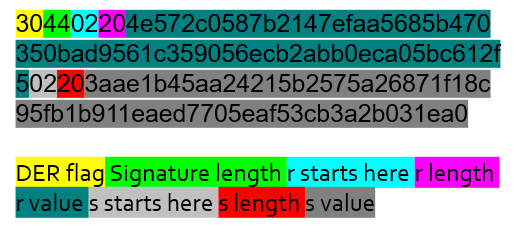

In [28]:
import ecdsa
random_number = bytes.fromhex("D9EB2D0AEF02246253F6B14765458B9BED04557B6880C4A14DA8B8A615ADBF24")
signing_key = ecdsa.SigningKey.from_string(random_number, curve=ecdsa.SECP256k1) # Don't forget to specify the curve
signature = signing_key.sign_digest(hash_2, sigencode = ecdsa.util.sigencode_der_canonize) # The signature is alreasy specified in DER format!
print(signature.hex())

30440220438d9018c4c7246eb72067f75ae83018af7a1549e5ccdaf82f4f33a0c5b2fca6022015aacf43441fc90db1f4767be39c244fe2e828362c0686bd3c7cd0ccec853266


### Add your public key
In order to verify the message, you should provide your public key alongside the signed message. Make sure to provide the public key that matches the hashed public key as specified in the redeem script you're trying to solve. 

The sigScript binary map:
https://en.bitcoin.it/wiki/File:TxBinaryMap.png

In [29]:
verifying_key = signing_key.get_verifying_key()

# Use this code block if the address you gave corresponds to the compressed public key
# public_key = bytes.fromhex("04") + verifying_key.to_string()

# Use this code block if the address you gave corresponds to the uncompressed public key
x_cor = bytes.fromhex(verifying_key.to_string().hex())[:32] # The first 32 bytes are the x cordinate
y_cor = bytes.fromhex(verifying_key.to_string().hex())[32:] # The last 32 bytes are the y cordinate
if int.from_bytes(y_cor, byteorder="big", signed=True) % 2 == 0: # We need to turn the y_cor into a number. 
    public_key = bytes.fromhex("02" + x_cor.hex())
else:
    public_key = bytes.fromhex("03" + x_cor.hex())




sigScript = ((len(signature) + 1).to_bytes(1, byteorder="little", signed=False)
            + signature
            + bytes.fromhex("01")
            + (len(public_key)).to_bytes(1, byteorder="little", signed=False)
            + public_key
)
sigScript_size = (len(sigScript)).to_bytes(1, byteorder="little", signed=False)

## Constructing the finale transaction

In [30]:
finale_tx = ( version
            + tx_in_count
            + prv_tx_id
            + index
            + sigScript_size
            + sigScript
            + sequence
            + tx_out_count
            + tx_out_value
            + tx_out_pubScript_size
            + tx_out_pubScript
            + lock_time
             
             # No more need for the hashcode
            
    )
print(finale_tx.hex())

0100000001ee0b77940dfcb9bde5e0ca8b75026ec4902111cd6629aec7c7abecde2f5b3469000000006a4730440220438d9018c4c7246eb72067f75ae83018af7a1549e5ccdaf82f4f33a0c5b2fca6022015aacf43441fc90db1f4767be39c244fe2e828362c0686bd3c7cd0ccec8532660121026fe3193db0db7f311e9dfa336f9a8203ae2537d9061eb16693c86fdf38c10136ffffffff01036ab70b000000001976a914cb25e188213ac1568bc81ba04012cedc04b42d9b88ac00000000


## Mind Food

Bitcoin TXID is determined by hashing the final_tx twice.
What implications this process might have?

## Resources

https://testnet.smartbit.com.au/api

https://blockchain.info/decode-tx

https://bitcore.io/playground/#/units

https://coinb.in/

https://en.bitcoin.it/wiki/File:TxBinaryMap.png

https://bitcoin.org/en/developer-reference#raw-transaction-format

http://royalforkblog.github.io/2014/11/20/txn-demo/